11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


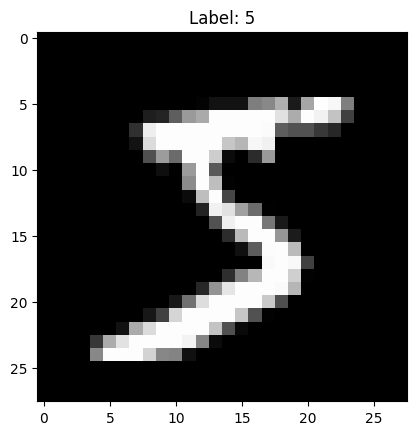

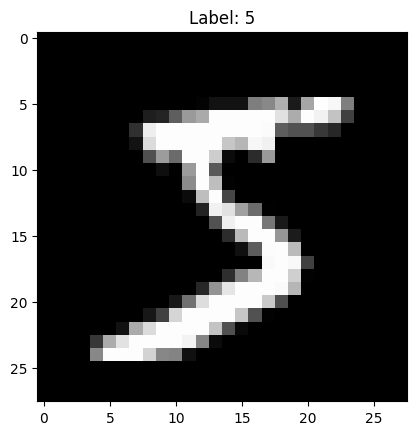

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Display the first image in the training set
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Display the first image in the training set
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()



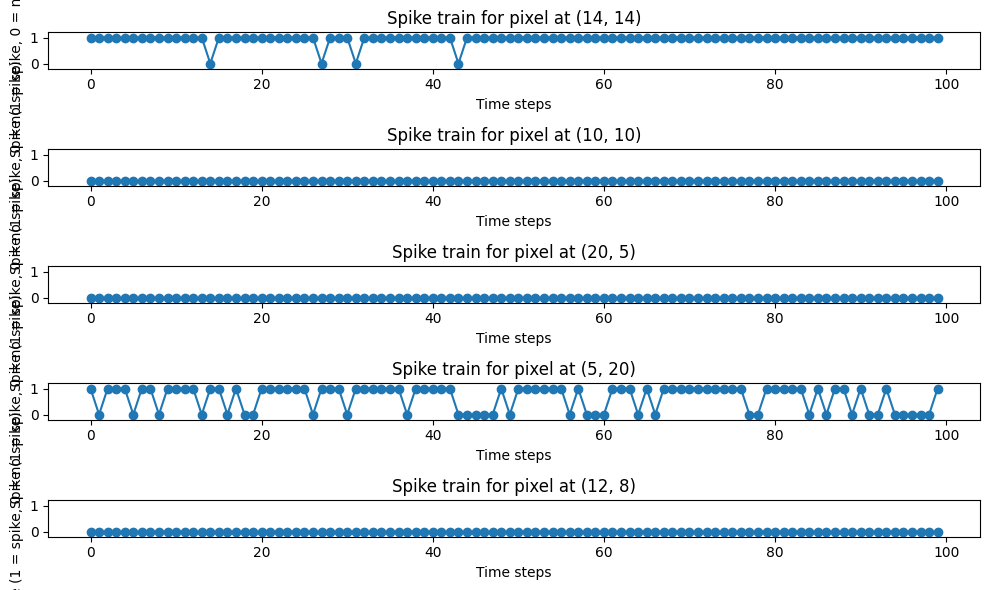

In [ ]:

import numpy as np


# Normalize the pixel values (to the range [0, 1])
train_images = train_images / 255.0
test_images = test_images / 255.0

# Function to encode pixel values into spikes using rate-based encoding
def generate_spike_train(image, time_steps=100):
    """
    Converts an image into a spike train using rate-based encoding.

    Args:
        image: 2D numpy array of shape (28, 28) with pixel intensities.
        time_steps: The number of time steps for spike generation.

    Returns:
        spike_train: A binary array of shape (28, 28, time_steps) where each entry is 1 if a spike occurs.
    """
    spike_train = np.random.rand(image.shape[0], image.shape[1], time_steps) < image[..., None]
    return spike_train

# Example: Generate spike trains for the first image in the training set
spike_train_example = generate_spike_train(train_images[0])

# Function to plot spike trains for multiple pixels
def plot_multiple_spike_trains(spike_train, pixel_coords, time_steps):
    """
    Plots spike trains for multiple pixels over the given time steps.

    Args:
        spike_train: The spike train data (28, 28, time_steps).
        pixel_coords: List of (row, col) pixel coordinates to visualize.
        time_steps: The number of time steps for the spike train.
    """
    plt.figure(figsize=(10, 6))

    for i, (row, col) in enumerate(pixel_coords):
        plt.subplot(len(pixel_coords), 1, i + 1)
        plt.plot(spike_train[row, col, :], marker='o')
        plt.title(f'Spike train for pixel at ({row}, {col})')
        plt.ylabel('Spike (1 = spike, 0 = no spike)')
        plt.ylim(-0.2, 1.2)  # Limit y-axis to make spikes clear
        plt.xlabel('Time steps')

    plt.tight_layout()
    plt.show()

# List of pixel coordinates to visualize (choose random pixels across the image)
pixels_to_visualize = [(14, 14), (10, 10), (20, 5), (5, 20), (12, 8)]  # Select different pixels

# Plot spike trains for the chosen pixels
plot_multiple_spike_trains(spike_train_example, pixels_to_visualize, time_steps=100)


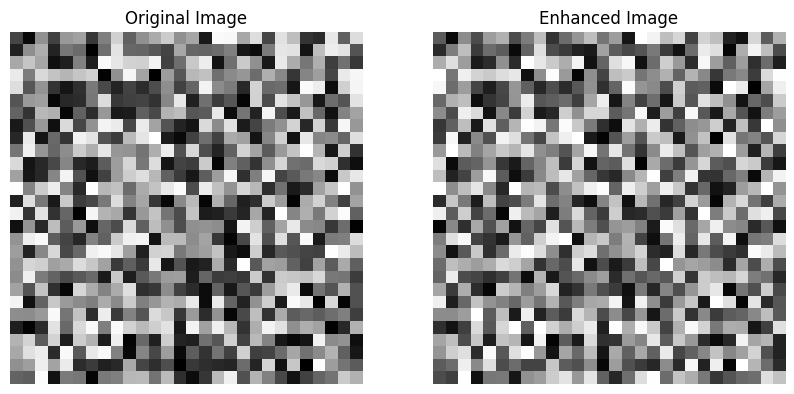

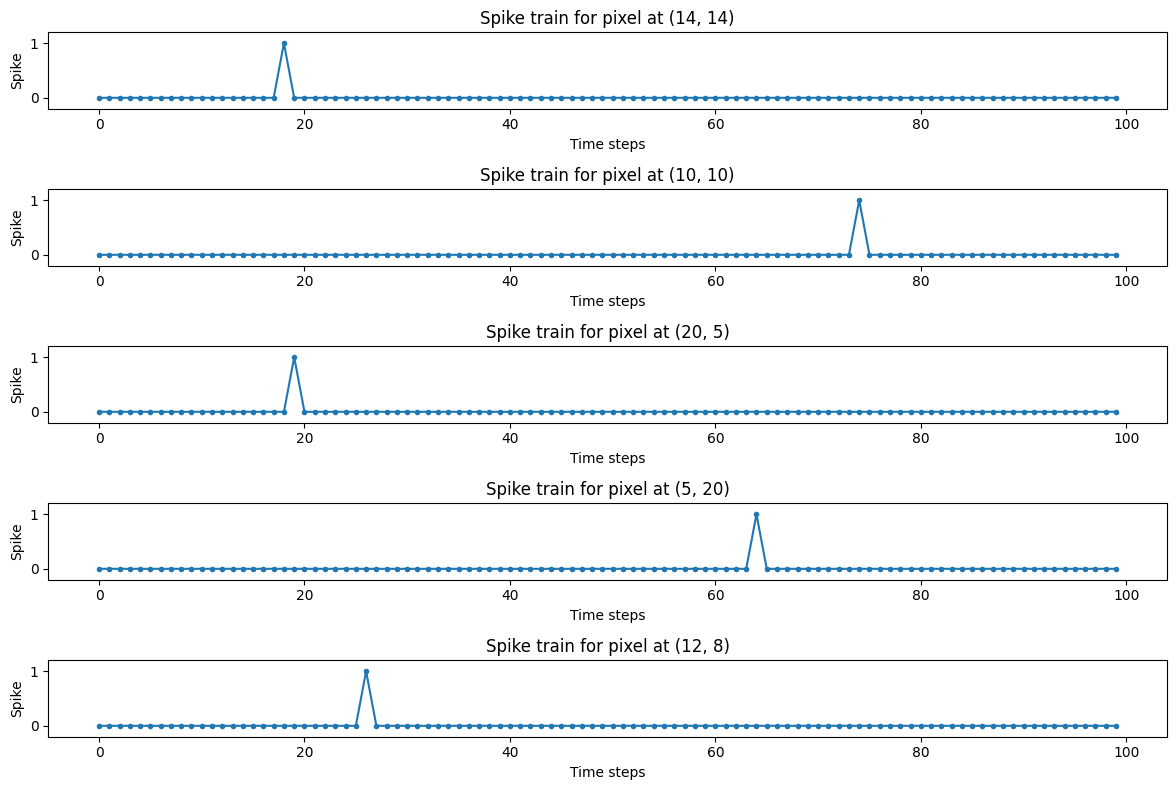

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to preprocess and enhance the image
def enhance_image(image, method='histogram_equalization'):
    if method == 'histogram_equalization':
        # Convert to uint8 if not already
        if image.dtype != np.uint8:
            image = (image * 255).astype(np.uint8)
        # Apply histogram equalization
        enhanced = cv2.equalizeHist(image)
        # Normalize back to [0, 1] range
        enhanced = enhanced.astype(float) / 255.0
    elif method == 'adaptive_histogram_equalization':
        # Convert to uint8 if not already
        if image.dtype != np.uint8:
            image = (image * 255).astype(np.uint8)
        # Apply adaptive histogram equalization
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced = clahe.apply(image)
        # Normalize back to [0, 1] range
        enhanced = enhanced.astype(float) / 255.0
    else:
        enhanced = image  # No enhancement
    return enhanced

# Function to encode pixel values into spikes using temporal encoding
def generate_spike_train_temporal(image, time_steps=100):
    spike_train = np.zeros((image.shape[0], image.shape[1], time_steps))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            spike_time = int((1 - image[i, j]) * time_steps)
            if spike_time < time_steps:
                spike_train[i, j, spike_time] = 1
    return spike_train

# Function to plot spike trains for multiple pixels
def plot_multiple_spike_trains(spike_train, pixel_coords, time_steps):
    plt.figure(figsize=(12, 8))
    for i, (row, col) in enumerate(pixel_coords):
        plt.subplot(len(pixel_coords), 1, i + 1)
        plt.plot(spike_train[row, col, :], marker='o', markersize=3)
        plt.title(f'Spike train for pixel at ({row}, {col})')
        plt.ylabel('Spike')
        plt.ylim(-0.2, 1.2)
        plt.xlabel('Time steps')
    plt.tight_layout()
    plt.show()

# Function to process and visualize spikes
def process_and_visualize_spikes(image, pixel_coords, time_steps=100, enhancement_method='histogram_equalization'):
    # Enhance the image
    enhanced_image = enhance_image(image, method=enhancement_method)

    # Generate spike train from the enhanced image
    spike_train = generate_spike_train_temporal(enhanced_image, time_steps)

    # Plot the original and enhanced images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')
    plt.show()

    # Plot spike trains for the chosen pixels
    plot_multiple_spike_trains(spike_train, pixel_coords, time_steps)

# Main process
def main():
    # Assuming train_images is your dataset of MNIST images
    # For this example, we'll create a sample image
    sample_image = np.random.rand(28, 28)  # Replace with actual MNIST image

    # List of pixel coordinates to visualize
    pixels_to_visualize = [(14, 14), (10, 10), (20, 5), (5, 20), (12, 8)]

    # Process and visualize spikes
    process_and_visualize_spikes(sample_image, pixels_to_visualize, enhancement_method='adaptive_histogram_equalization')

if __name__ == "__main__":
    main()

SSN

In [ ]:
!pip install snntorch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 784.2 kB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import snntorch as snn

class SNNRL(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_layer = snn.Leaky(beta=0.95)
        self.hidden_layer = snn.Leaky(beta=0.95)
        self.output_layer = snn.Leaky(beta=0.95)

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x, num_steps):
        spk_rec = []
        mem_rec = []

        # Initialize hidden states and output
        mem1 = self.input_layer.init_leaky()
        mem2 = self.hidden_layer.init_leaky()
        mem3 = self.output_layer.init_leaky()

        for _ in range(num_steps):
            cur1 = self.fc1(x)
            spk1, mem1 = self.input_layer(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.hidden_layer(cur2, mem2)
            spk3, mem3 = self.output_layer(spk2, mem3)
            spk_rec.append(spk3)
            mem_rec.append(mem3)

        return torch.stack(spk_rec, dim=0), torch.stack(mem_rec, dim=0)

Reinforcement Learning

In [ ]:
import numpy as np

class RLAgent:
    def __init__(self, action_space):
        self.action_space = action_space
        self.q_table = {}
        self.learning_rate = 0.1
        self.discount_factor = 0.95
        self.epsilon = 0.1

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.action_space)

        if state not in self.q_table:
            self.q_table[state] = np.zeros(len(self.action_space))

        return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(len(self.action_space))

        if next_state not in self.q_table:
            self.q_table[next_state] = np.zeros(len(self.action_space))

        current_q = self.q_table[state][action]
        max_next_q = np.max(self.q_table[next_state])
        new_q = current_q + self.learning_rate * (reward + self.discount_factor * max_next_q - current_q)
        self.q_table[state][action] = new_q

Data loaders


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert the numpy arrays to PyTorch tensors
train_images_tensor = torch.from_numpy(train_images).float()
train_labels_tensor = torch.from_numpy(train_labels).long()
test_images_tensor = torch.from_numpy(test_images).float()
test_labels_tensor = torch.from_numpy(test_labels).long()

# Create TensorDatasets
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



TRaining


In [ ]:
import torch.nn.functional as F
import torch.optim as optim


def train_snn_rl(model, agent, train_loader, num_epochs, num_steps):
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()

            # Normalize the data (ensure it's in [0,1] range)
            data = data / 255.0

            # Convert data to spike train (batch of images to spike trains)
            spike_data = torch.stack([torch.from_numpy(generate_spike_train_temporal(img.numpy(), num_steps)) for img in data])

            # Ensure spike_data is of type float32
            spike_data = spike_data.float()

            # Flatten the input for the model
            spike_data = spike_data.view(spike_data.size(0), -1, num_steps)

            # Get the initial state (spike input for time step 0)
            state = spike_data[:, :, 0].flatten().numpy()

            for t in range(num_steps):
                action = agent.get_action(tuple(state))
                spk_out, _ = model(spike_data[:, :, t], 1)

                # Use Cross-Entropy Loss
                loss = F.cross_entropy(spk_out.squeeze(), target)

                # Calculate reward based on prediction (negative loss)
                reward = -loss.item()

                # Get next state
                next_state = spike_data[:, :, t+1].flatten().numpy() if t < num_steps-1 else state

                # Update the Q-table of the RL agent
                agent.update_q_table(tuple(state), action, reward, tuple(next_state))

                # Move to the next state
                state = next_state

            # Backpropagation step
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}/{num_epochs} completed")


testing'


In [ ]:
def test_snn_rl(model, test_loader, num_steps):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            # Normalize data and convert to spike trains
            data = data / 255.0
            spike_data = torch.stack([torch.from_numpy(generate_spike_train_temporal(img.numpy(), num_steps)) for img in data])

            # Flatten the spike data
            spike_data = spike_data.view(spike_data.size(0), -1, num_steps)

            spk_out, _ = model(spike_data, num_steps)

            # Sum the output spikes and make predictions
            _, predicted = spk_out.sum(dim=0).max(1)

            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
def generate_spike_train_temporal(image, time_steps=100):
    spike_train = np.zeros((image.shape[0], image.shape[1], time_steps))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            spike_time = int((1 - image[i, j]) * time_steps)
            if spike_time < time_steps:
                spike_train[i, j, spike_time] = 1
    return spike_train
# Initialize model and agent
input_size = 28 * 28  # MNIST images are 28x28
hidden_size = 128
output_size = 10  # 10 digit classes (0-9)

model = SNNRL(input_size, hidden_size, output_size)
agent = RLAgent(action_space=range(output_size))

# Train the model
train_snn_rl(model, agent, train_loader, num_epochs=10, num_steps=100)

# Test the model


# New Section

In [ ]:
# Initialize model and agent
input_size = 28 * 28  # MNIST images are 28x28
hidden_size = 128
output_size = 10  # 10 digit classes (0-9)

model = SNNRL(input_size, hidden_size, output_size)
agent = RLAgent(action_space=range(output_size))
def test_snn_rl(model, test_loader, num_steps):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            # Normalize data and convert to spike trains
            data = data / 255.0
            spike_data = torch.stack([torch.from_numpy(generate_spike_train_temporal(img.numpy(), num_steps)) for img in data])

            # Flatten the spike data
            spike_data = spike_data.view(spike_data.size(0), -1, num_steps)

            spk_out, _ = model(spike_data, num_steps)

            # Sum the output spikes and make predictions
            _, predicted = spk_out.sum(dim=0).max(1)

            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

test_snn_rl(model, test_loader, num_steps=100)


NameError: name 'SNNRL' is not defined